In [4]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
np.random.seed(10)

In [5]:
(x_train_image,y_train_lebel),(x_test_image,y_test_lebel)=mnist.load_data()

In [6]:
x_train_4d=x_train_image.reshape(x_train_image.shape[0],28,28,1).astype('float32')
x_test_4d=x_test_image.reshape(x_test_image.shape[0],28,28,1).astype('float32')
x_train_image.shape[0] # x_train_image.shape[0]返回的是行數(直)


60000

In [7]:
x_train_4d_normalization=x_train_4d/255
x_test_4d_normalization=x_test_4d/255
y_train_onehot=np_utils.to_categorical(y_train_lebel)
y_test_onehot=np_utils.to_categorical(y_test_lebel)

In [8]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation='relu')) # padding='same'表示當超出邊界時會補0
model.add(MaxPooling2D(pool_size=(2,2))) # 16張圖片,28*28=>16張圖片,14*14
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # 36張圖片,14*14=>36張圖片,7*7
model.add(Dropout(0.25))
model.add(Flatten()) # 36*7*7=1764個神經元
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
print(model.summary())




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)             

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_train_4d_normalization,y=y_train_onehot,validation_split=0.2,epochs=10,batch_size=300,verbose=2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.4671 - accuracy: 0.8539 - val_loss: 0.0990 - val_accuracy: 0.9698
Epoch 2/10
 - 1s - loss: 0.1330 - accuracy: 0.9605 - val_loss: 0.0657 - val_accuracy: 0.9801
Epoch 3/10
 - 1s - loss: 0.0992 - accuracy: 0.9695 - val_loss: 0.0549 - val_accuracy: 0.9840
Epoch 4/10
 - 1s - loss: 0.0797 - accuracy: 0.9763 - val_loss: 0.0480 - val_accuracy: 0.9862
Epoch 5/10
 - 1s - loss: 0.0700 - accuracy: 0.9788 - val_loss: 0.0429 - val_accuracy: 0.9874
Epoch 6/10
 - 1s - loss: 0.0632 - accuracy: 0.9807 - val_loss: 0.0428 - val_accuracy: 0.9878
Epoch 7/10
 - 1s - loss: 0.0540 - accuracy: 0.9836 - val_loss: 0.0369 - val_accuracy: 0.9891
Epoch 8/10
 - 1s - loss: 0.0498 - accuracy: 0.9847 - val_loss: 0.0372 - val_accuracy: 0.9899
Epoch 9/10
 - 1s - loss: 0.0455 - accuracy: 0.9866 - val_loss: 0.0357 - val_accuracy: 0.9908
Epoch 10/10
 - 1s - loss: 0.0420 - accuracy: 0.9869 - val_loss: 0.0320 - val_accuracy: 0.9919


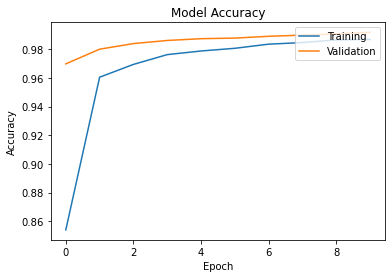

In [21]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
#     plt.title['Train History'] # 不明原因bug
#     plt.ylabel['train']
#     plt.xlabel['epochs']
    plt.legend(['train','validation'],loc='lower right')
    plt.show()
    
# show_train_history(train_history,'accuracy','val_accuracy')
# show_train_history(train_history,'loss','val_loss')
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

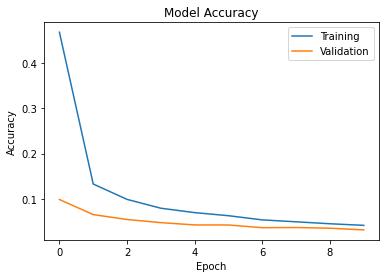

In [22]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

In [23]:
scores=model.evaluate(x_test_4d_normalization,y_test_onehot)
scores[1]

10000/10000 [==============================] - 0s 46us/step


0.9905999898910522

In [24]:
prediction=model.predict_classes(x_test_4d_normalization)
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [25]:
def show_image(image):
    figure=plt.gcf()
    figure.set_size_inches(2,2)
    plt.imshow(image,cmap='binary')
    plt.show()

predict: 7
predict: 2
predict: 1
predict: 0
predict: 4
predict: 1
predict: 4
predict: 9
predict: 5
predict: 9
實際結果:


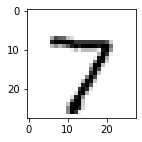

實際結果:


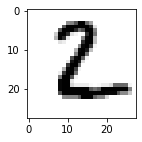

實際結果:


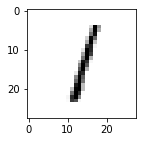

實際結果:


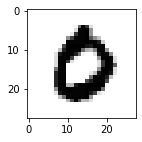

實際結果:


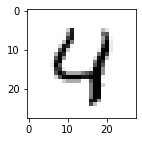

實際結果:


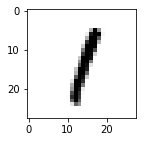

實際結果:


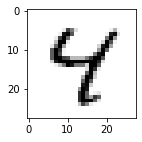

實際結果:


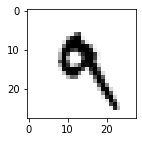

實際結果:


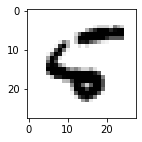

實際結果:


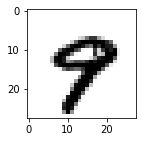

In [26]:
for i in range(10):
    print('predict:',prediction[i])

for i in range(10):
    print('實際結果:')
    show_image(x_test_image[i])

In [27]:
pd.crosstab(y_test_lebel,prediction,rownames=['reality'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
reality,,,,,,,,,,
0,975,0,0,0,0,0,2,1,2,0
1,0,1126,1,0,0,1,1,1,5,0
2,4,0,1026,0,0,0,0,1,1,0
3,0,0,2,1001,0,3,0,1,3,0
4,0,0,0,0,977,0,1,0,1,3
5,1,0,1,3,0,883,4,0,0,0
6,4,2,0,0,1,1,949,0,1,0
7,0,1,8,1,0,0,0,1016,1,1
8,3,0,1,1,0,0,0,1,967,1
